<h1 style="font-family:Times;text-align:center;font-variant:small-caps;color:#FFFFFF;background-color:#3300CC;border-radius:8px">Bank Customer Churn</h1>

<style>
      .img-container {
        text-align: center;
      }
</style>
<div class="img-container"> <!-- Block parent element -->
      <img src="https://s16353.pcdn.co/wp-content/uploads/2018/06/Churn.png" alt="Bank Customer Churn">
</div>

<h1 style="font-family:Times;font-variant:small-caps;color:#FFFFFF;background-color:#3300CC;border-radius:8px">Indice</h1>

* [1. Introducción](#1)
    * [1.1 Presentación](#1-1)
    * [1.2 Librerias](#1-2)
    * [1.3 Importación Dataset](#1-3)
    * [1.4 Columnas](#1-4)
* [2. Exploratory Data Analysis (EDA)](#2)
    * [2.1 Missing Data](#2-1)
    * [2.2 Análisis de Variables](#2-2)
* [3. Variable Target](#3)
    * [3.1 Information Value](#3-1)
    * [3.2 Arbol de Decisiones](#3-2) 

<a id="1"></a>
<h1 style="font-family:Times;font-variant:small-caps;color:#FFFFFF;background-color:#3300CC;border-radius:8px">Introduccion</h1>

<a id="1-1"></a>
<h3 style="text-align:left;border-radius:8px;font-family:Times;font-variant:small-caps;color:#FFFFFF;background-color:#3300CC;">Presentación</h3>

<h5 style="text-align:left;text-decoration:underline;border-radius:8px;font-family:Times;font-variant:small-caps;color:#FFFFFF;">Motivación:</h5>

El análisis que presentamos tiene como objetivo comprender los patrones de retención de clientes en un banco. La retención de clientes es un indicador crucial para el éxito a largo plazo de nuestro banco. Entender los factores que influyen en la retención nos permitirá tomar decisiones estratégicas informadas para mejorar la satisfacción del cliente y la lealtad.

<h5 style="text-align:left;text-decoration:underline;border-radius:8px;font-family:Times;font-variant:small-caps;color:#FFFFFF;">Contexto Comercial:</h5>

En el competitivo mundo bancario, la retención de clientes no solo se trata de mantener números; es un componente fundamental para el crecimiento sostenible y la construcción de relaciones a largo plazo. Nuestra atención se centra en identificar oportunidades para fortalecer la conexión con nuestros clientes y anticipar sus necesidades.

<a id="1-2"></a>
<h3 style="text-align:left;border-radius:8px;font-family:Times;font-variant:small-caps;color:#FFFFFF;background-color:#3300CC;">Librerias</h3>


In [754]:
# Comencemos importando nuestras librerias
import pandas as pd
import numpy as np
import ast
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from datetime import datetime

# Librerías para arboles de decision 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Librería matriz de confusión
from sklearn.metrics import confusion_matrix
# Librería para curva de ROC
from sklearn.metrics import roc_curve, auc
# Librerias para regresión logística
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf

pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid') 
sns.set(font_scale = 1)

<a id="1-3"></a>
<h3 style="text-align:left;border-radius:8px;font-family:Times;font-variant:small-caps;color:#FFFFFF;background-color:#3300CC;">Importación Dataset</h3>


*Importemos nuestra muestra de datos para comenzar el ánalisis*

In [755]:
url = 'https://raw.githubusercontent.com/ApocalypseScrambler/datascience2/main/Credit%20Card%20customers/BankChurners.csv'

# Levanto el archivo 
df = pd.read_csv(url,sep = ',')

# Vamos algunos de sus datos
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.00,777,11914.00,1.33,1144,42,1.62,0.06,0.00,1.00
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.00,864,7392.00,1.54,1291,33,3.71,0.10,0.00,1.00
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.00,0,3418.00,2.59,1887,20,2.33,0.00,0.00,1.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.00,2517,796.00,1.41,1171,20,2.33,0.76,0.00,1.00
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.00,0,4716.00,2.17,816,28,2.50,0.00,0.00,1.00


In [756]:
#Elimino columnas que no serán analizadas por no contar con datos relevantes
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [757]:
# Veamos cantidad de registros y columnas
df.shape

(10127, 21)

In [758]:
#Descripción de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<a id="1-4"></a>
<h3 style="text-align:left;border-radius:8px;font-family:Times;font-variant:small-caps;color:#FFFFFF;background-color:#3300CC;">Columnas</h3>


*A Continuación veremos cada una de las variables que contaremos para el ánalisis y su definición*

* <b><u>CLIENTNUM:</u></b> Número de cliente. Identificador único del cliente titular de la cuenta.
* <b><u>Attrition_Flag:</u></b> variable de evento interno (actividad del cliente): si la cuenta está cerrada, entonces 1, si no, 0.
* <b><u>Customer_Age:</u></b> Variable demográfica - Edad del cliente en años
* <b><u>Gender:</u></b> Variable demográfica - M=Hombre, F=Mujer
* <b><u>Dependent_count:</u></b> Variable demográfica - Número de dependientes
* <b><u>Education_Level:</u></b> Variable demográfica - Calificación educativa del titular de la cuenta (ejemplo: escuela secundaria, graduado universitario, etc.)
* <b><u>Marital_Status:</u></b> variable demográfica: casado, soltero, divorciado, desconocido
* <b><u>Income_Category:</u></b> Variable demográfica - Categoría de ingreso anual del titular de la cuenta (< 40K, 40K - 60K, 60K - 80K, 80K-120K, >)           
* <b><u>Card_Category:</u></b> Variable de producto - Tipo de tarjeta (Blue, Silver, Gold, Platinum)             
* <b><u>Months_on_book:</u></b> Periodo de relación con el banco
* <b><u>Total_Relationship_Count:</u></b> Número total. de productos en poder del cliente
* <b><u>Months_Inactive_12_mon:</u></b> No. de meses inactivos en los últimos 12 meses
* <b><u>Contacts_Count_12_mon:</u></b> No. de contactos en los últimos 12 meses
* <b><u>Credit_Limit:</u></b> Límite de crédito en la tarjeta de crédito
* <b><u>Total_Revolving_Bal:</u></b> Saldo rotativo total de la tarjeta de crédito
* <b><u>Avg_Open_To_Buy:</u></b> Línea de crédito abierta para comprar (promedio de los últimos 12 meses)
* <b><u>Total_Amt_Chng_Q4_Q1:</u></b> Cambio en el monto de la transacción (Q4 sobre Q1)
* <b><u>Total_Trans_Amt:</u></b> Monto total de la transacción (últimos 12 meses)
* <b><u>Total_Trans_Ct:</u></b> Recuento total de transacciones (últimos 12 meses)
* <b><u>Total_Ct_Chng_Q4_Q1:</u></b> Cambio en el recuento de transacciones (Q4 sobre Q1)
* <b><u>Avg_Utilization_Ratio:</u></b> Índice de utilización promedio de la tarjeta

<a id="2"></a>
<h1 style="text-align:left;border-radius:8px;font-family:Times;font-variant:small-caps;color:#FFFFFF;background-color:#3300CC;">Exploratory Data Analysis (EDA)</h1>

<a id="2-1"></a>
<h3 style="text-align:left;border-radius:8px;font-family:Times;font-variant:small-caps;color:#FFFFFF;background-color:#3300CC;">Missing Data</h3>

In [759]:
#Veamos que campos tenemos con null
print('Nulls')
print('----------------------------')
print(df.isnull().sum())

Nulls
----------------------------
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


*Como se puede observar, el conjunto de datos no presenta ningún valor nulo en sus registros.*

In [760]:
# Controlemos no tener ID de Clientes duplicados
duplicates = df['CLIENTNUM'].duplicated()
print("Número de duplicados en 'CLIENTNUM':", duplicates.sum())

Número de duplicados en 'CLIENTNUM': 0


*La variable CLIENTNUM nos muestra una unicidad completa, mostrandonos sin repetición a los clientes del banco en la muestra.*

In [761]:
#Examinemos algunos datos generales de los campos numéricos.
print(df.describe())

         CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count     10127.00      10127.00         10127.00        10127.00   
mean  739177606.33         46.33             2.35           35.93   
std    36903783.45          8.02             1.30            7.99   
min   708082083.00         26.00             0.00           13.00   
25%   713036770.50         41.00             1.00           31.00   
50%   717926358.00         46.00             2.00           36.00   
75%   773143533.00         52.00             3.00           40.00   
max   828343083.00         73.00             5.00           56.00   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                  10127.00                10127.00   
mean                       3.81                    2.34   
std                        1.55                    1.01   
min                        1.00                    0.00   
25%                        3.00                    2.00   
50%                     

*El conjunto de datos no presenta valores nulos, y los datos con valores de cero son pertinentes e informativos, por lo que no es necesario realizar correcciones en estos datos. Además, la edad de los clientes se encuentra dentro de un rango válido.*

In [762]:
# Veamos los tipos de datos
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

*Los tipos de datos son acordes a los valores que se manejan en cada columna.*

<h5 style="text-align:left;text-decoration:underline;border-radius:8px;font-family:Times;font-variant:small-caps;color:#FFFFFF;">Resumen del Dataset:</h5>

Nuestro conjunto de datos abarca una variedad de variables que capturan información demográfica, de productos y comportamental de nuestros clientes. Desde el número único de cliente hasta detalles sobre tarjetas de crédito, ingresos y transacciones, cada columna nos brinda una perspectiva única.
Esta muestra consta con 10127 clientes distintos y 21 variables.

<a id="2-2"></a>
<h3 style="text-align:left;border-radius:8px;font-family:Times;font-variant:small-caps;color:#FFFFFF;background-color:#3300CC;">Análisis de Variables</h3>

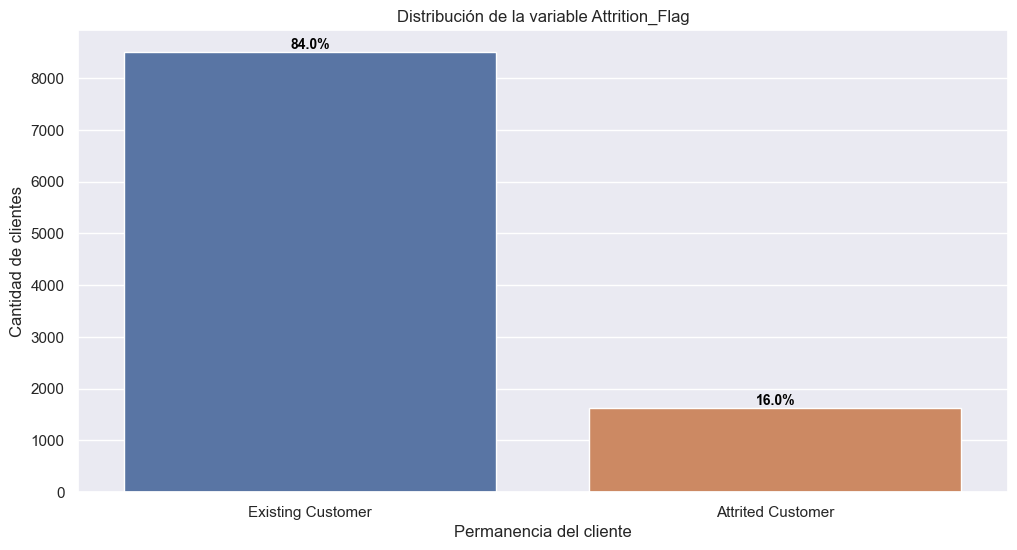

In [763]:
# Veamos la distribución de la variable Attrition_Flag que será nuestra variable target
plt.figure(figsize=(12, 6))

cantidad = len(df['Attrition_Flag'])

sns.countplot(data = df,
              x = "Attrition_Flag")
plt.xlabel('Permanencia del cliente')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de la variable Attrition_Flag')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

*En esta muestra de datos que nos encontramos analizando, tenemos un 84% de clientes retenidos y un 16% de clientes perdidos.*

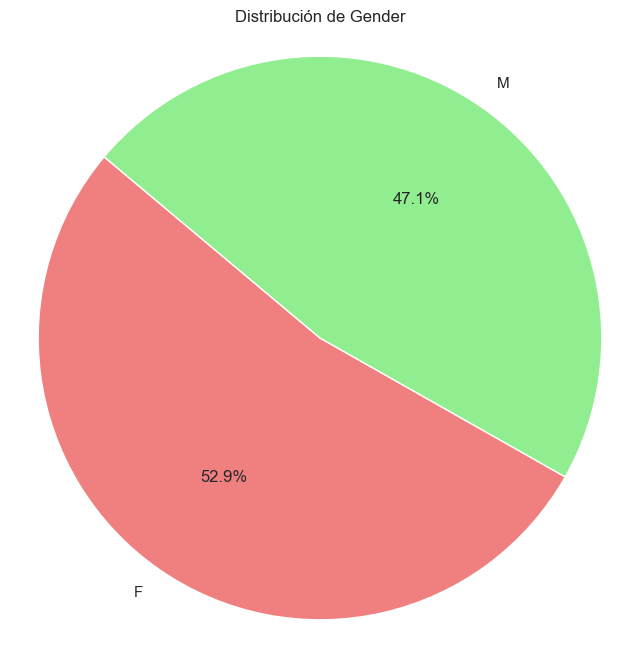

In [764]:
# Calcular la distribución de las categorías de Gender
gender_counts = df['Gender'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen'])
plt.title("Distribución de Gender")
plt.axis('equal')  # Proporciona un círculo perfecto

plt.show()

*La distribución de género de los clientes del banco es prácticamente equitativa en ambos casos, lo que sugiere que esta variable no parece tener un impacto significativo en la retención de clientes.*

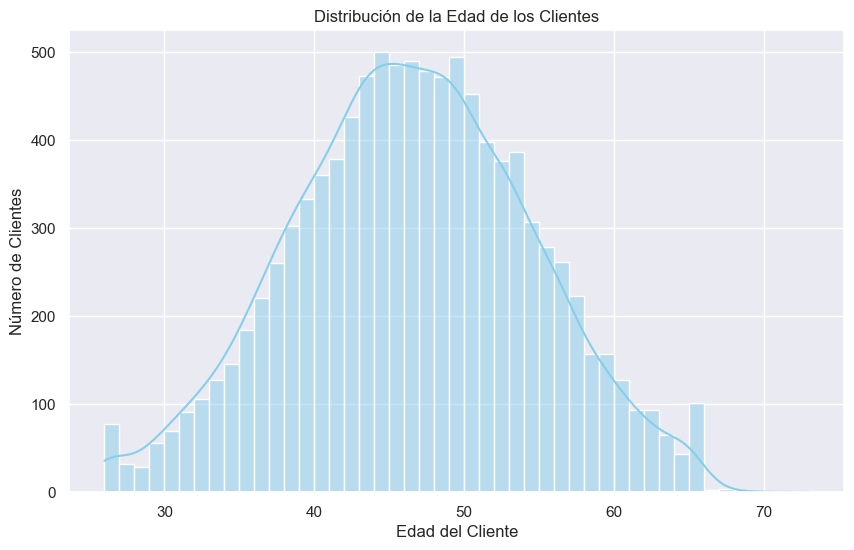

In [765]:
#Ahora la distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Customer_Age", kde=True, color="skyblue")
plt.title("Distribución de la Edad de los Clientes")
plt.xlabel("Edad del Cliente")
plt.ylabel("Número de Clientes")

plt.show()

*Es evidente que la distribución de edades de los clientes en nuestro conjunto de datos sigue una distribución bastante normal. Veamos como es la distribución de la edad en comparación con los clientes retenidos y aquellos que no.*

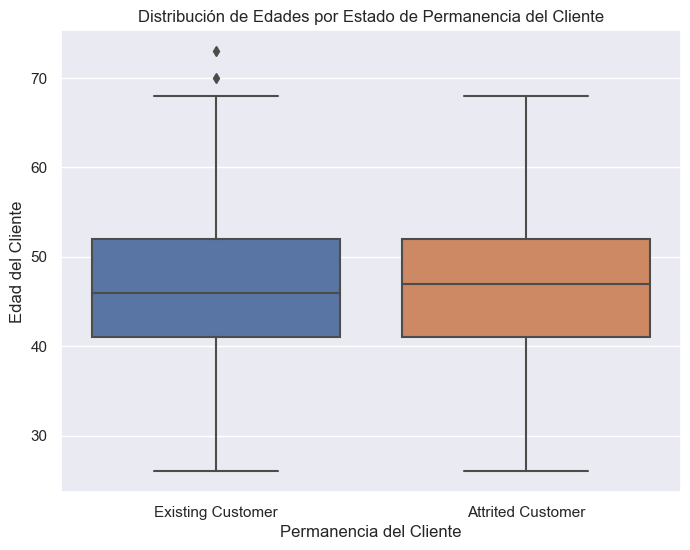

In [766]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df)
plt.title("Distribución de Edades por Estado de Permanencia del Cliente")
plt.xlabel("Permanencia del Cliente")
plt.ylabel("Edad del Cliente")
plt.show()

*La distribución de la edad de los clientes del banco es uniforme tanto para los clientes que permanecen, como los que ya se fueron. Lo que nos lleva a especular que la edad no tiene un impacto predictivo para la retención de los clientes.*

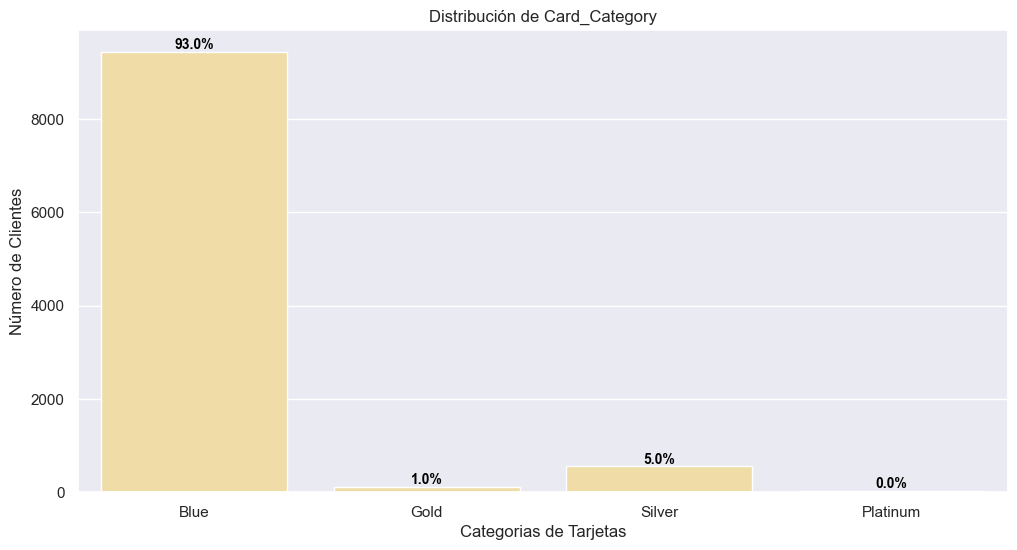

In [767]:
# Calcular la distribución de las categorías de Card_Category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Card_Category", color="#fce29a")
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.title("Distribución de Card_Category")
plt.xlabel("Categorias de Tarjetas")
plt.ylabel("Número de Clientes")

plt.show()

*El 93% de los clientes, es decir, prácticamente la totalidad, utiliza un paquete básico de tarjetas. Ahora, examinemos la relación entre este hecho y la retención de los clientes.*

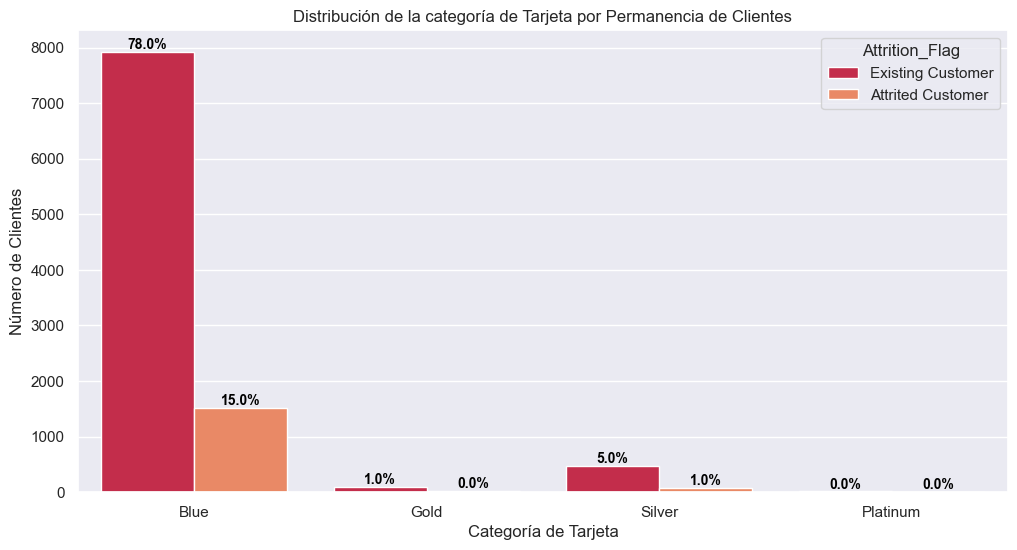

In [768]:
#Veamos los tipos de tarjetas y su distribución por permanencia
custom_palette = {"Existing Customer": "#DC143C", "Attrited Customer": "#FF7F50"}

plt.figure(figsize = (12, 6))
sns.countplot(x = df['Card_Category'], hue = df['Attrition_Flag'], palette=custom_palette)
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.title("Distribución de la categoría de Tarjeta por Permanencia de Clientes")
plt.xlabel("Categoría de Tarjeta")
plt.ylabel("Número de Clientes")
plt.show()

*Como era de esperar, la mayoría de los clientes opta por el tipo de tarjeta Blue. Aunque los grupos restantes son pequeños en cantidad, ser cliente con uno de estos paquetes podría ser un indicativo de que el cliente tendrá alta probabilidad de permanecer mas tiempo en el banco.*

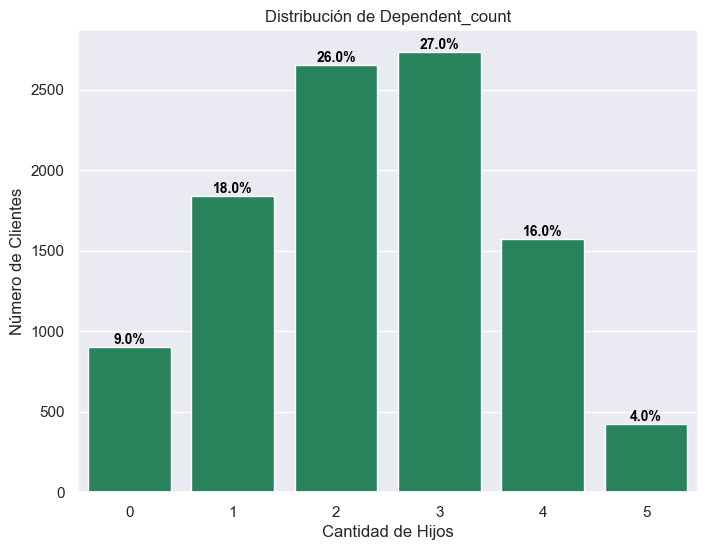

In [769]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Dependent_count", color="#199260")
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.title("Distribución de Dependent_count")
plt.xlabel("Cantidad de Hijos")
plt.ylabel("Número de Clientes")

plt.show()

*La distribución de los dependientes (hijos) se distribuye de forma bastante normal. Veamos en comparación con los clientes retenidos y aquellos que dejaron de serlo para ver si hay algún patrón.*

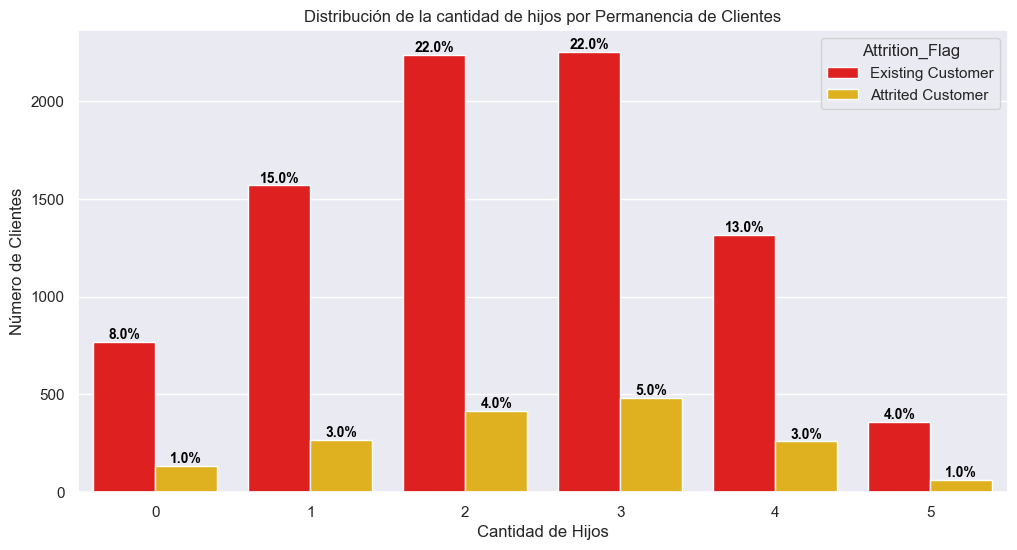

In [770]:
#Veamos la cantidad de hijos y su distribución por permanencia
custom_palette = {"Existing Customer": "#ff0000", "Attrited Customer": "#ffc100"}

plt.figure(figsize = (12, 6))
sns.countplot(x = df['Dependent_count'], hue = df['Attrition_Flag'], palette=custom_palette)
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.title("Distribución de la cantidad de hijos por Permanencia de Clientes")
plt.xlabel("Cantidad de Hijos")
plt.ylabel("Número de Clientes")
plt.show()

*Esta distribución en comparativa no nos arroja un valor que se pueda aprovechar para nuestra predicción.*

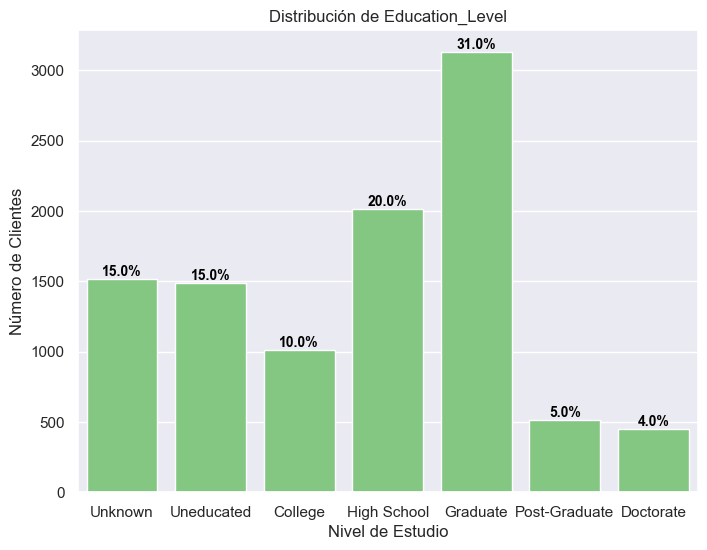

In [771]:
# Calcular la distribución de las categorías de Education_Level
# Definimos un orden para el nivel de educación
education_order = ['Unknown','Uneducated','College','High School','Graduate','Post-Graduate','Doctorate']

# Convierte la columna 'Education_Level' en un tipo categórico con el orden deseado
df['Education_Level'] = pd.Categorical(df['Education_Level'], categories=education_order, ordered=True)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Education_Level", color="#78d278")
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.title("Distribución de Education_Level")
plt.xlabel("Nivel de Estudio")
plt.ylabel("Número de Clientes")

plt.show()

*Podemos afirmar que el 70% de los clientes posee educación, mientras que el 30% restante no la posee. De este 30%, un 15% se clasifica como desconocido. Veamos si el nivel de estudio puede ofrecernos un valor predictivo mayor a las variables anteriores.*

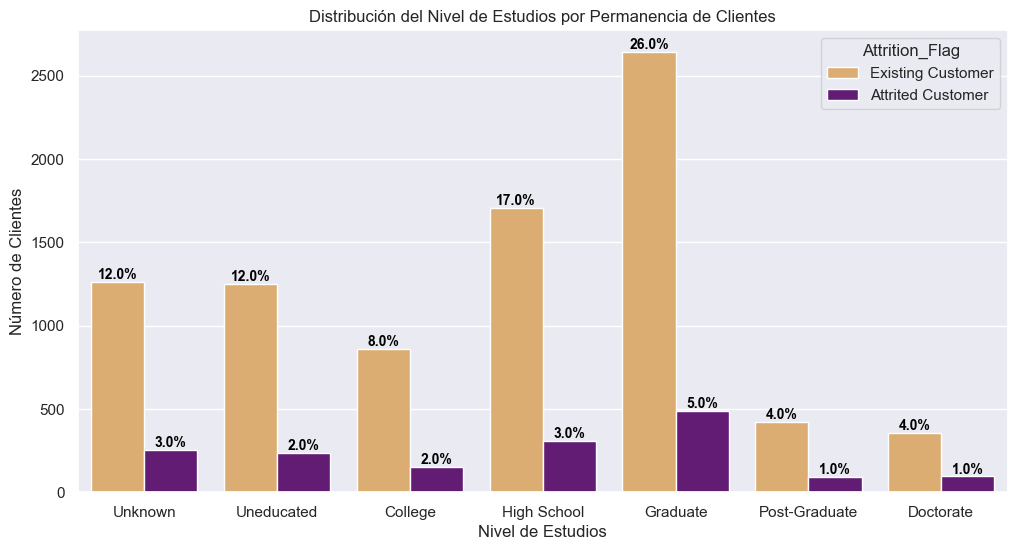

In [772]:
#Veamos los niveles de estudios de los clientes y su distribución por permanencia
custom_palette = {"Existing Customer": "#eeaf61", "Attrited Customer": "#6a0d83"}

plt.figure(figsize = (12, 6))
sns.countplot(x = df['Education_Level'], hue = df['Attrition_Flag'], palette=custom_palette)
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.title("Distribución del Nivel de Estudios por Permanencia de Clientes")
plt.xlabel("Nivel de Estudios")
plt.ylabel("Número de Clientes")
plt.show()

*La comparativa nos demuestra que el nivel de educación no posee un poder predictivo relevante.*

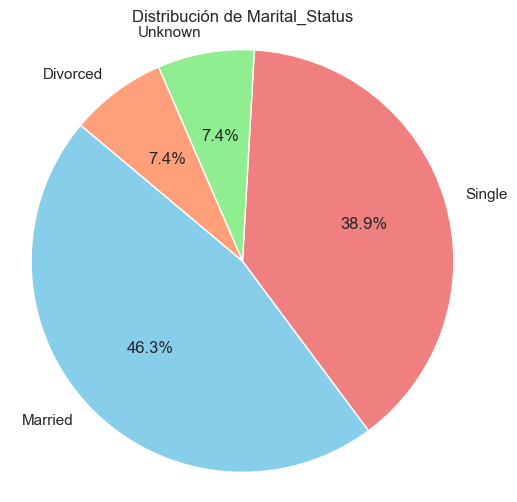

In [773]:
# Calcular la distribución de las categorías de Marital_Status
education_counts = df['Marital_Status'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue', 'lightpink', 'lightyellow'])
plt.title("Distribución de Marital_Status")
plt.axis('equal')  # Proporciona un círculo perfecto

plt.show()

*Casi la mitad de los clientes del banco están casados, mientras que la otra mitad son clientes solteros, en una proporción sorprendentemente equitativa. Solo aproximadamente el 7% de los clientes están divorciados.*

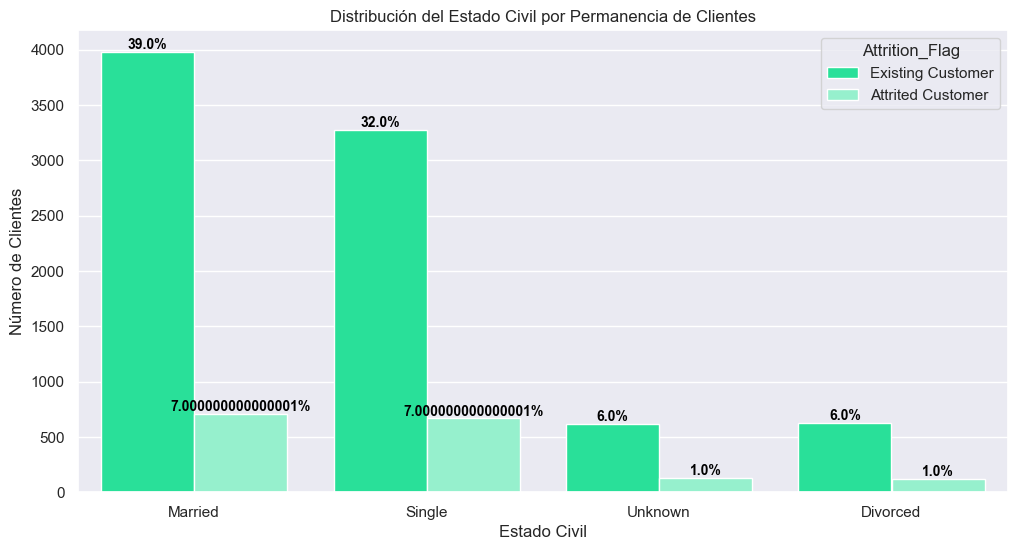

In [774]:
#Veamos la distribución del estado civil y su distribución por permanencia
custom_palette = {"Existing Customer": "#0affa0", "Attrited Customer": "#87ffd0"}

plt.figure(figsize = (12, 6))
sns.countplot(x = df['Marital_Status'], hue = df['Attrition_Flag'], palette=custom_palette)
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.title("Distribución del Estado Civil por Permanencia de Clientes")
plt.xlabel("Estado Civil")
plt.ylabel("Número de Clientes")
plt.show()

*El estado civil de los clientes del banco no muestra, nuevamente un valor significativo para el ánalisis de la predicción.*

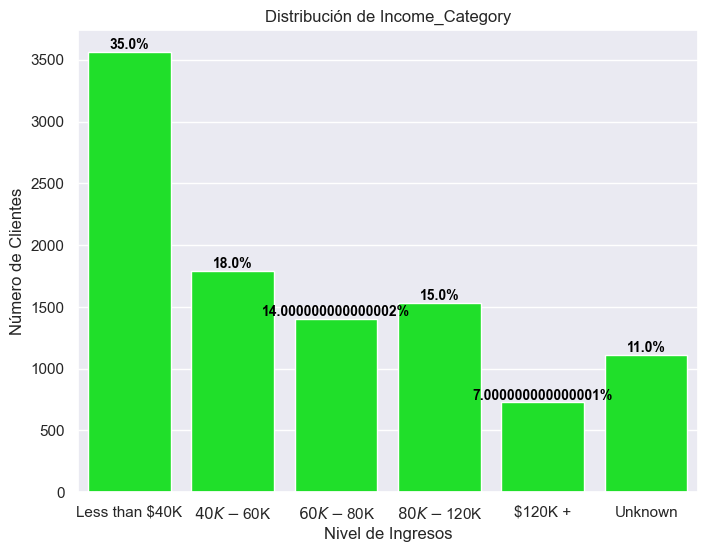

In [775]:
# Calcular la distribución de las categorías de Income_Category
# Definimos un orden para los ingresos
income_order = ['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown']

# Convierte la columna 'Income_Category' en un tipo categórico con el orden deseado
df['Income_Category'] = pd.Categorical(df['Income_Category'], categories=income_order, ordered=True)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Income_Category", color="#00ff0d")
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.title("Distribución de Income_Category")
plt.xlabel("Nivel de Ingresos")
plt.ylabel("Número de Clientes")

plt.show()

*Contamos con un 67% de los clientes del banco que tienen ingresos inferiores a los $80,000, y un 82% con ingresos por debajo de los $120,000, aunque también se registra un 11% con ingresos desconocidos.*

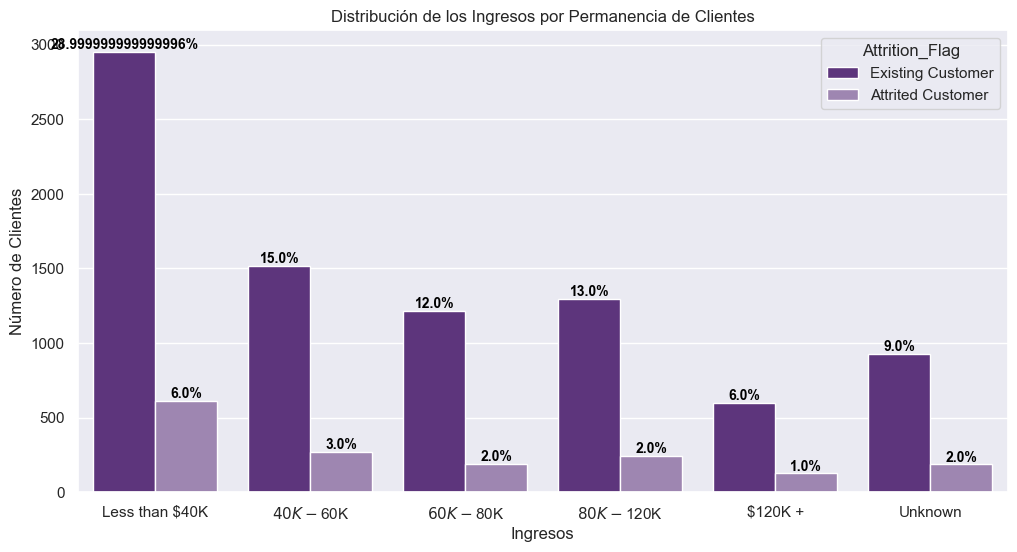

In [776]:
#Veamos la distribución del ingreso y su comparativa por permanencia
custom_palette = {"Existing Customer": "#5f2988", "Attrited Customer": "#9f7fb8"}

plt.figure(figsize = (12, 6))
sns.countplot(x = df['Income_Category'], hue = df['Attrition_Flag'], palette=custom_palette)
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.title("Distribución de los Ingresos por Permanencia de Clientes")
plt.xlabel("Ingresos")
plt.ylabel("Número de Clientes")
plt.show()

*La permanencia de los clientes en base a sus ingreso parece tener un valor predictivo bajo.*

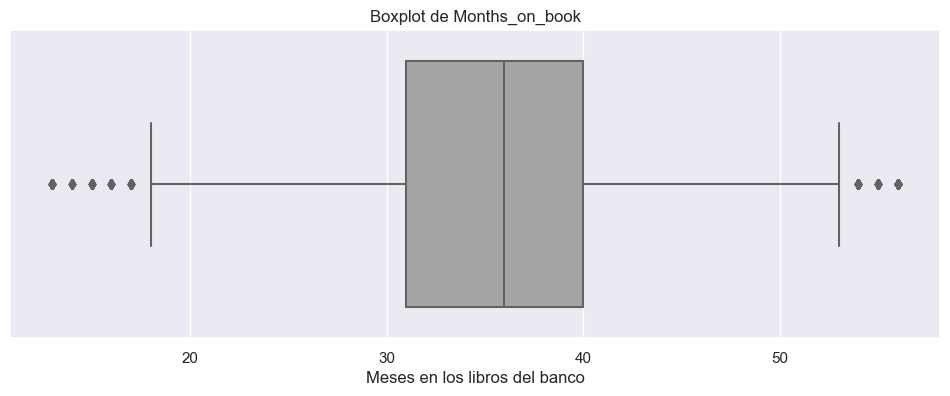

In [777]:
# Crea el boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['Months_on_book'], color="#a5a5a5")
plt.title("Boxplot de Months_on_book")
plt.xlabel("Meses en los libros del banco")

plt.show()

*La mayoría de los clientes tienen una permanencia en los libros del banco que oscila entre más de 30 meses y hasta 40 meses.*

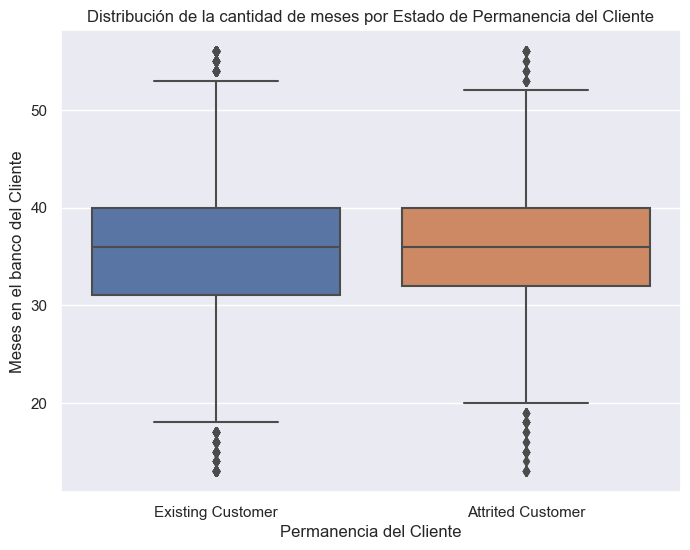

In [778]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=df)
plt.title("Distribución de la cantidad de meses por Estado de Permanencia del Cliente")
plt.xlabel("Permanencia del Cliente")
plt.ylabel("Meses en el banco del Cliente")
plt.show()

*En esta variable nos demuestra lo que se espera, los clientes retenidos optan por permanecer mas tiempo en el banco y por el contrario los que dejan de ser clientes permanecen menor cantidad de tiempo.*

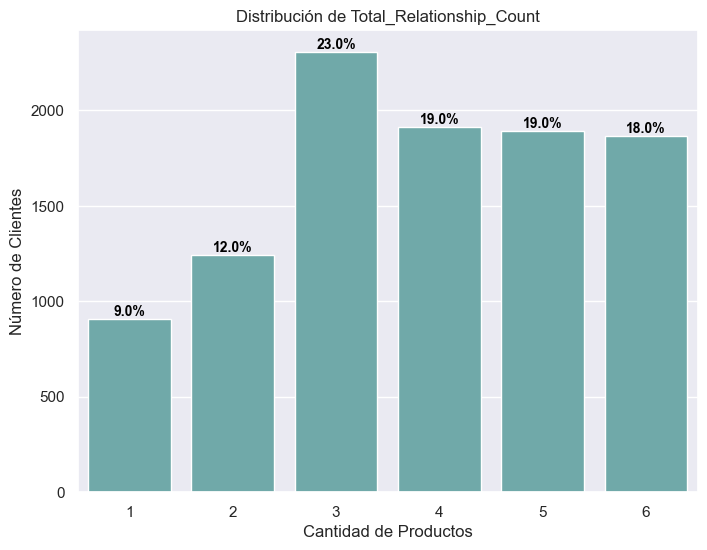

In [779]:
# Calcular la distribución de Total_Relationship_Count
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Total_Relationship_Count", color="#66b2b2")
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.title("Distribución de Total_Relationship_Count")
plt.xlabel("Cantidad de Productos")
plt.ylabel("Número de Clientes")

plt.show()

*El 79% de los clientes tiene tres o más productos del banco.*

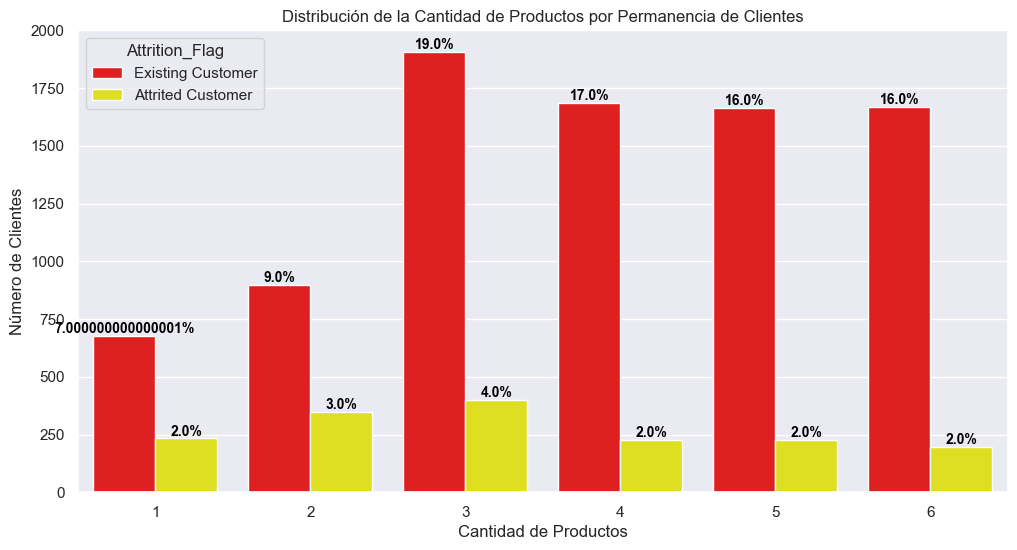

In [780]:
#Veamos la distribución de la cantidad de productos y su distribución por permanencia
custom_palette = {"Existing Customer": "#ff0000", "Attrited Customer": "#fdff00"}

plt.figure(figsize = (12, 6))
sns.countplot(x = df['Total_Relationship_Count'], hue = df['Attrition_Flag'], palette=custom_palette)
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.title("Distribución de la Cantidad de Productos por Permanencia de Clientes")
plt.xlabel("Cantidad de Productos")
plt.ylabel("Número de Clientes")
plt.show()

*La cantidad de productos contratados por los clientes no muestra un valor predictivo importante.*

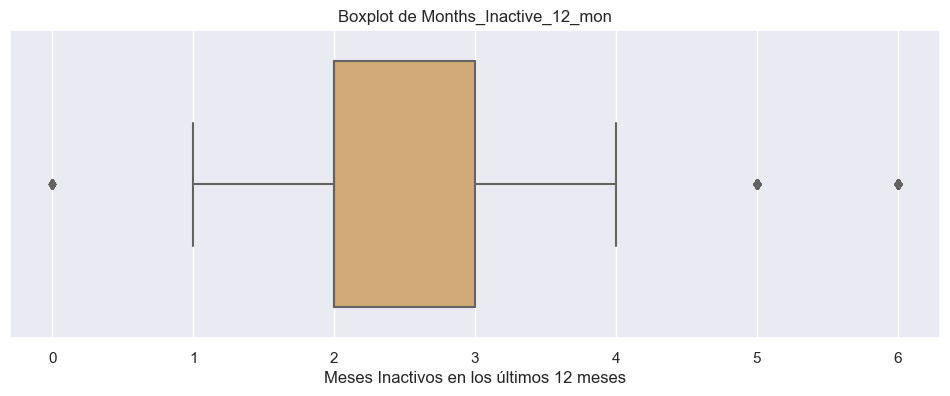

In [781]:
# Crea el boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['Months_Inactive_12_mon'], color="#e0ac69")
plt.title("Boxplot de Months_Inactive_12_mon")
plt.xlabel("Meses Inactivos en los últimos 12 meses")

plt.show()

*La mayoría de los clientes que permanecen inactivos lo hacen durante un período de 2 a 3 meses.*

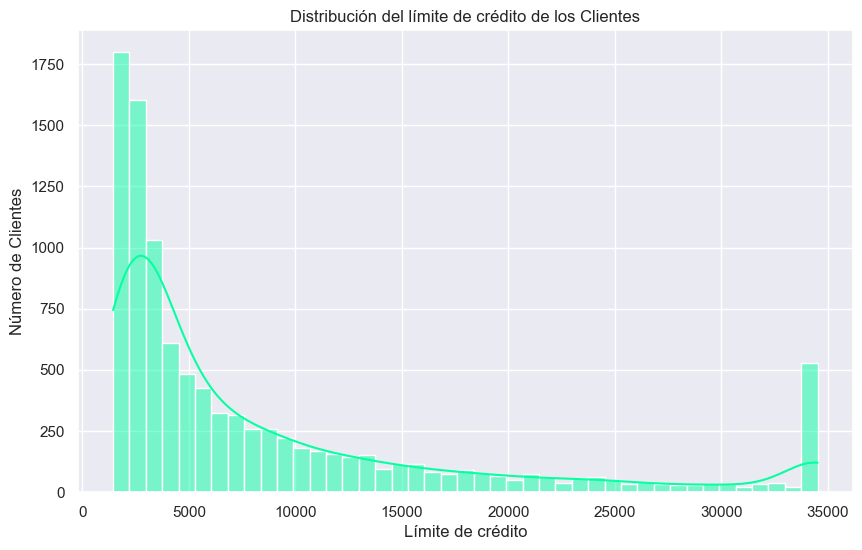

In [782]:
#Ahora la distribución del Credit_Limit
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Credit_Limit", kde=True, color="#05ffa1")
plt.title("Distribución del límite de crédito de los Clientes")
plt.xlabel("Límite de crédito")
plt.ylabel("Número de Clientes")

plt.show()

*Un gran número de clientes tiene límites de crédito bajos, lo que indica que esta variable sigue una distribución asimétrica positiva, ya que concentra una gran proporción de registros en valores bajos y muestra muy pocos registros en valores altos.*

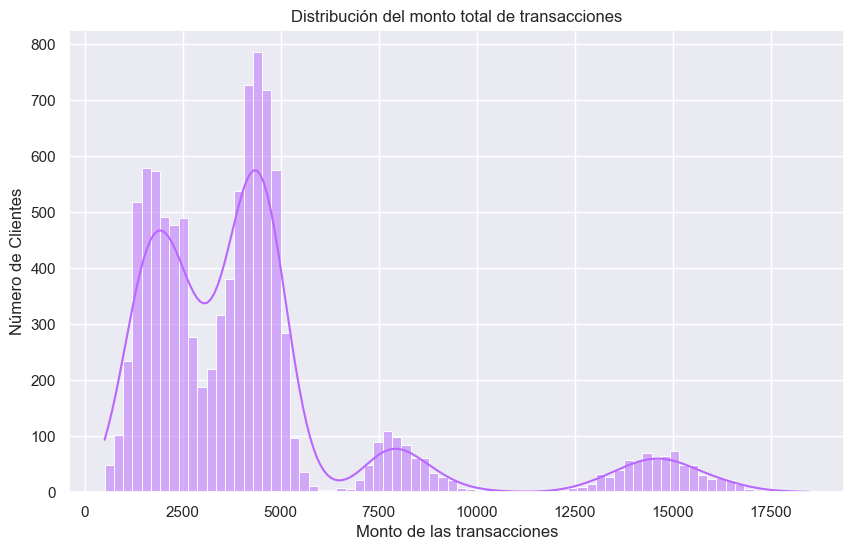

In [783]:
#Ahora la distribución del Total_Trans_Amt
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Total_Trans_Amt", kde=True, color="#b967ff")
plt.title("Distribución del monto total de transacciones")
plt.xlabel("Monto de las transacciones")
plt.ylabel("Número de Clientes")

plt.show()

*En los montos de las transacciones, observamos una distribución multimodal, ya que parece haber cuatro grupos significativos, cada uno de los cuales sigue una distribución normal.*

<a id="3"></a>
<h3 style="text-align:left;border-radius:8px;font-family:Times;font-variant:small-caps;color:#FFFFFF;background-color:#3300CC;">Variable Target</h3>

*Nuestra variable objetivo indica un valor de 1 si el cliente todavía mantiene su relación con el banco y un valor de 0 si ya no es cliente.*

In [784]:
Attrition_Flag_map = {
    'Existing Customer' : 1,
    'Attrited Customer' : 0
}

df.loc[:, 'Attrition_Flag'] = df['Attrition_Flag'].map(Attrition_Flag_map)
df['Attrition_Flag'] = df['Attrition_Flag'].astype(int)

*El objetivo de este análisis es identificar los patrones más efectivos para distinguir entre los clientes que permanecen y los que dejan de serlo.*

*La variable objetivo es **Attrition_Flag** que es de naturaleza binaria. En consecuencia, el modelo a desarrollar será de tipo **Aprendizaje Supervisado: Clasificación**.*

*A continuación, se presentarán algunas estadísticas con el propósito de comprender el comportamiento, el formato y la distribución de esta variable.*

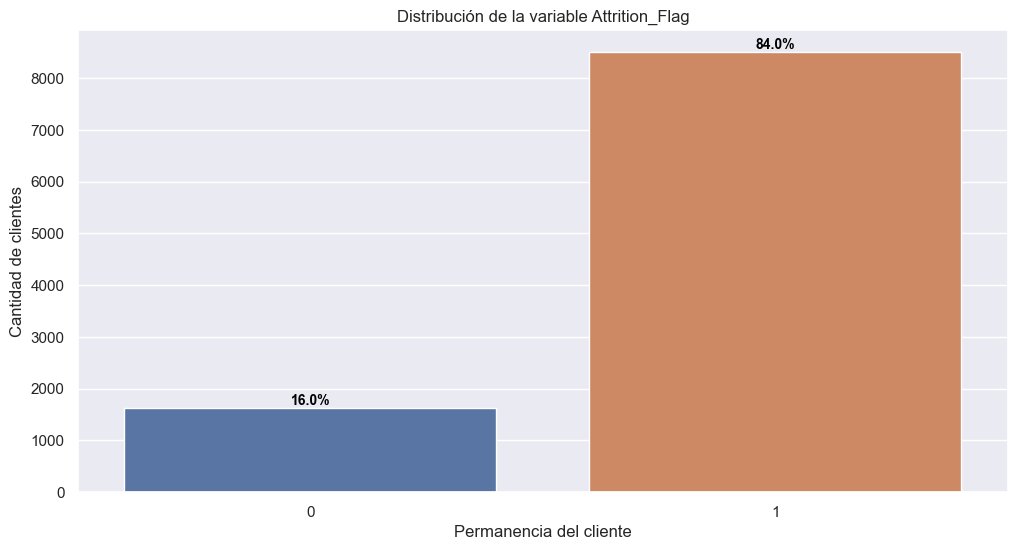

In [785]:
# Veamos nuestra variable target gráficamente
plt.figure(figsize=(12, 6))

cantidad = len(df['Attrition_Flag'])

sns.countplot(data = df,
              x = "Attrition_Flag")
plt.xlabel('Permanencia del cliente')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de la variable Attrition_Flag')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

<a id="3-1"></a>
<h3 style="text-align:left;border-radius:8px;font-family:Times;font-variant:small-caps;color:#FFFFFF;background-color:#3300CC;">Information Value</h3>

*Creemos una función que nos permita calcular el information value de cualquier variable que querramos de nuestra dataset. Esta recibira nuestro df, la variable de la cual calcularemos el IV y nuestra variable target.*

In [786]:
def calculate_iv(df, variable, target):
    # Calcula el número total de eventos y no eventos
    total_events = df[target].sum()
    total_non_events = df[target].count() - total_events

    # Crea una tabla de contingencia entre la variable y el target
    iv_table = pd.crosstab(df[variable], df[target])

    epsilon = 0.1

    # Calcula el porcentaje de eventos y no eventos en cada categoría de la variable,
    # agregando 0.5 para evitar divisiones por cero
    iv_table['event_percentage'] = (iv_table[1] + epsilon) / (total_events + epsilon)
    iv_table['non_event_percentage'] = (iv_table[0] + epsilon) / (total_non_events + epsilon)

    # Calcula la diferencia entre los porcentajes de eventos y no eventos
    iv_table['percentage_diff'] = iv_table['event_percentage'] - iv_table['non_event_percentage']

    # Calcula el logaritmo natural de la razón, asegurándose de manejar valores de 0
    iv_table['ln_ratio'] = np.log(iv_table['event_percentage'] / iv_table['non_event_percentage'])

    # Calcula el IV para cada categoría y suma todos los IV para obtener el IV total
    iv_table['IV'] = iv_table['percentage_diff'] * iv_table['ln_ratio']
    iv = iv_table['IV'].sum()

    return round(iv,2)

*Ahora pasemos todas nuestras variables por nuestra función y veamos los distintos IV de cada uno de ellas.*

In [787]:
# Crear un diccionario para almacenar los resultados
iv_results = {'Variable': [], 'IV': []}

# Lista de variables a analizar
variables_a_analizar = ['Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']  # Agrega aquí las variables que desees analizar

# Loop para calcular IV para cada variable
for variable in variables_a_analizar:
    iv_value = calculate_iv(df, variable, 'Attrition_Flag')  # Utiliza la función calculate_iv que definimos anteriormente
    iv_results['Variable'].append(variable)
    iv_results['IV'].append(iv_value)

# Crear el DataFrame a partir del diccionario
iv_results_df = pd.DataFrame(iv_results)

# Ordena el DataFrame por la columna "IV" en orden descendente (mayor IV primero)
iv_results_df = iv_results_df.sort_values(by='IV', ascending=False)

# Mostrar los resultados
iv_results_df


,Variable,IV
15,Total_Trans_Amt,4.03
13,Avg_Open_To_Buy,3.63
11,Credit_Limit,3.23
12,Total_Revolving_Bal,2.21
17,Total_Ct_Chng_Q4_Q1,2.17
16,Total_Trans_Ct,2.07
18,Avg_Utilization_Ratio,1.60
14,Total_Amt_Chng_Q4_Q1,1.23
10,Contacts_Count_12_mon,0.55
9,Months_Inactive_12_mon,0.37


*Hemos corroborado lo que anteriormente se detecto en los gráficos, las variables Gender, Income_Category, Education_Level, Dependent_count, Card_Category, Marital_Status no tiene valor predictivo para nuestra variable target. El resto de las variables demuestra un poder predictivo alto y analizaremos con mayor atención aquellas con un valor muy alto.*

<a id="3-2"></a>
<h3 style="text-align:left;border-radius:8px;font-family:Times;font-variant:small-caps;color:#FFFFFF;background-color:#3300CC;">Árbol de Decisiones</h3>

*Creemos nuevos predictores basandonos en algunas de las variables que mayor IV dieron. Estas nuevas variables binarias se crean en base a los gráficos anteriores donde a criterio nuestro determinamos un punto de inflexión.*

In [788]:
# Genero predictores a usar
df['Es_Cliente'] = df['Attrition_Flag'] == 1
df['Es_Adulto_Joven'] = df['Customer_Age'] < 45
df['Tiene_muchos_productos'] = df['Total_Relationship_Count'] > 4
df['Usa_Mucho_tarjeta'] = df['Avg_Utilization_Ratio'] > 0.50
df['Tiene_Cartera_Credito_Alto'] = df['Avg_Open_To_Buy'] > 9900
df['Mueve_Mucho_Dinero'] = df['Total_Trans_Amt'] > 4700
df['Posee_Credito_Alto'] = df['Credit_Limit'] > 11000
df['Saldo_Rotativo_Alto'] = df['Total_Revolving_Bal'] > 1700

# Los enlisto: 
lista_predictores = ['Es_Adulto_Joven','Tiene_muchos_productos','Usa_Mucho_tarjeta','Mueve_Mucho_Dinero','Posee_Credito_Alto','Tiene_Cartera_Credito_Alto','Saldo_Rotativo_Alto']

# Los transformo en matriz: 
X = df[lista_predictores].values

In [789]:
# Genero vector de target
y = df['Es_Cliente'].values

In [790]:
# Genero modelo: árbol de decisión 
clf = DecisionTreeClassifier(random_state = 1234, # Semilla aleatoria
                             criterion = 'gini', # Funcion para medir calidad de la división
                             splitter = 'best', # Estrategia para elegir la división de cada nodo
                             max_depth = 4, # Profundidad máxima del árbol
                             min_samples_leaf = 20 # Mínima cantidad de registros por nodo final
                            )
clf.feature_names = lista_predictores
model = clf.fit(X, y)

[Text(0.5446428571428571, 0.9, 'node #0\nUsa_Mucho_tarjeta <= 0.5\nsamples = 100.0%\nvalue = [0.161, 0.839]\nclass = Es Cliente'),
 Text(0.2857142857142857, 0.7, 'node #1\nSaldo_Rotativo_Alto <= 0.5\nsamples = 74.9%\nvalue = [0.185, 0.815]\nclass = Es Cliente'),
 Text(0.14285714285714285, 0.5, 'node #2\nTiene_muchos_productos <= 0.5\nsamples = 59.3%\nvalue = [0.206, 0.794]\nclass = Es Cliente'),
 Text(0.07142857142857142, 0.3, 'node #3\nMueve_Mucho_Dinero <= 0.5\nsamples = 38.0%\nvalue = [0.239, 0.761]\nclass = Es Cliente'),
 Text(0.03571428571428571, 0.1, 'node #4\nsamples = 25.8%\nvalue = [0.283, 0.717]\nclass = Es Cliente'),
 Text(0.10714285714285714, 0.1, 'node #5\nsamples = 12.3%\nvalue = [0.146, 0.854]\nclass = Es Cliente'),
 Text(0.21428571428571427, 0.3, 'node #6\nPosee_Credito_Alto <= 0.5\nsamples = 21.3%\nvalue = [0.147, 0.853]\nclass = Es Cliente'),
 Text(0.17857142857142858, 0.1, 'node #7\nsamples = 15.0%\nvalue = [0.16, 0.84]\nclass = Es Cliente'),
 Text(0.25, 0.1, 'node #

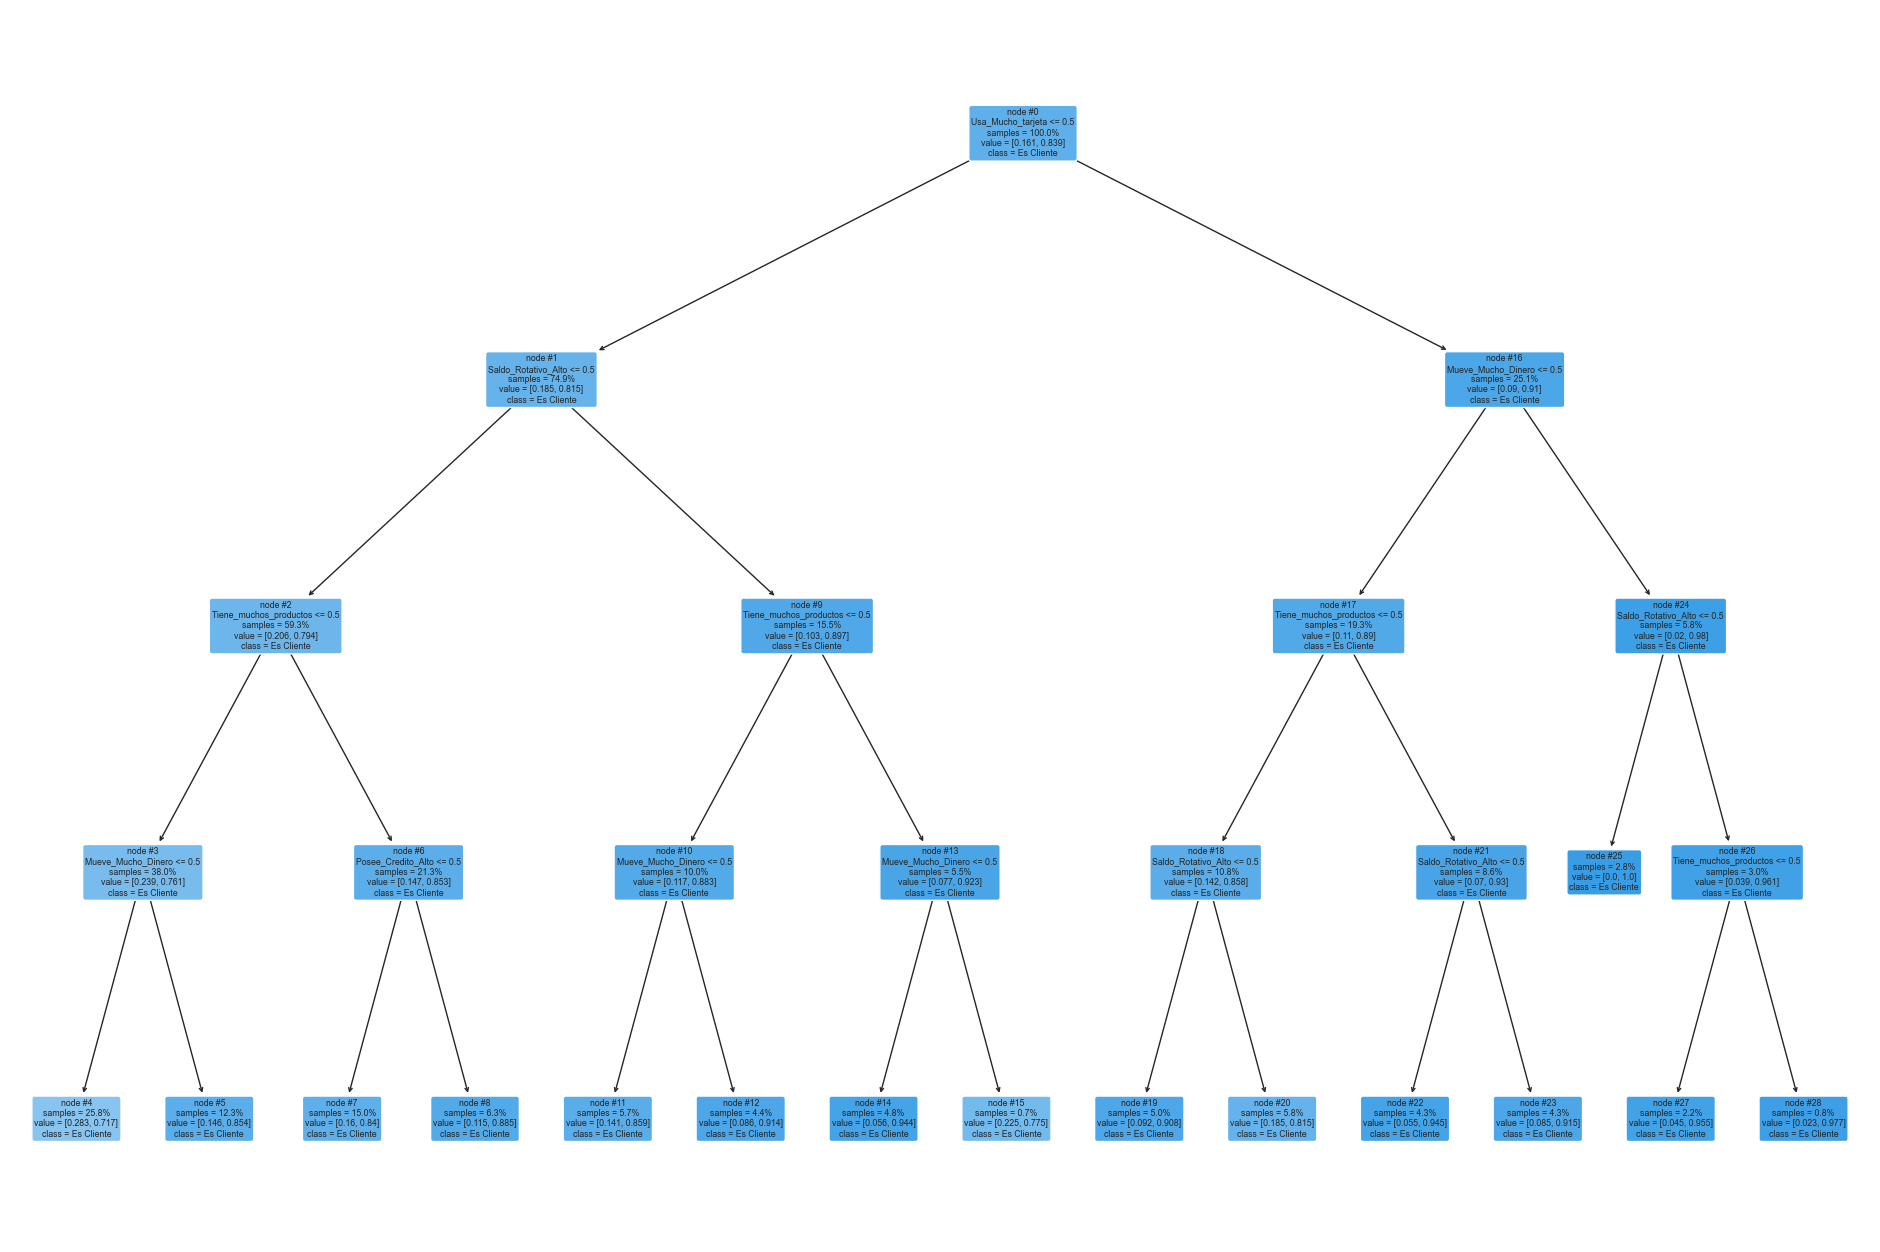

In [791]:
plt.figure(figsize=(24, 16))
plot_tree(clf, 
          filled = True, 
          rounded = True, 
          class_names = ['No es Cliente','Es Cliente'], 
          feature_names = lista_predictores, 
          impurity = False,
          proportion = True,
          node_ids = True)

In [792]:
# Genero predicciones  
df['Predict_Arbol_Clase'] = clf.predict(df[lista_predictores])
df['Predict_Arbol_Nodo'] = clf.apply(df[lista_predictores])

In [793]:
df['Predict_Arbol_Clase'].value_counts()

Predict_Arbol_Clase
True    10127
Name: count, dtype: int64

In [794]:
df['Predict_Arbol_Nodo'].value_counts()

Predict_Arbol_Nodo
4     2610
7     1523
5     1241
8      634
20     588
11     573
19     502
14     486
12     444
22     435
23     433
25     281
27     220
28      86
15      71
Name: count, dtype: int64

In [795]:
# Groupby por prediccion de clase: 
resultados = df.groupby('Predict_Arbol_Clase').agg(
    Cant = ('Predict_Arbol_Clase', 'count'),              
    Cant_Cliente = ('Es_Cliente', 'sum'),            
    Tasa_EsCliente = ('Es_Cliente', 'mean')    
).reset_index()
resultados

,Predict_Arbol_Clase,Cant,Cant_Cliente,Tasa_EsCliente
0,True,10127,8500,0.84


In [796]:
# Groupby por prediccion de nodo: 
resultados_nodo = df.groupby('Predict_Arbol_Nodo').agg(     
    Cant = ('Predict_Arbol_Nodo', 'count'),              
    Cant_Cliente = ('Es_Cliente', 'sum'),            
    Tasa_EsCliente = ('Es_Cliente', 'mean')    
).reset_index()
resultados_nodo.rename(columns={'Tasa_Cliente': 'Predict_Prob_Arbol'}, inplace=True)
resultados_nodo_ordenado = resultados_nodo.sort_values(by='Tasa_EsCliente', ascending=False)
resultados_nodo_ordenado

,Predict_Arbol_Nodo,Cant,Cant_Cliente,Tasa_EsCliente
12,25,281,281,1.00
14,28,86,84,0.98
13,27,220,210,0.95
10,22,435,411,0.94
6,14,486,459,0.94
11,23,433,396,0.91
5,12,444,406,0.91
8,19,502,456,0.91
3,8,634,561,0.88
4,11,573,492,0.86


In [809]:
# Groupby por prediccion de nodo: 
resultados_nodo = df.groupby('Predict_Arbol_Nodo').agg(     
    Cant = ('Predict_Arbol_Nodo', 'count'),              
    Cant_Cliente = ('Es_Cliente', 'sum'),            
    Tasa_EsCliente = ('Es_Cliente', 'mean')    
).reset_index()
resultados_nodo.rename(columns={'Tasa_EsCliente': 'Predict_Prob_Arbol'}, inplace=True)
resultados_nodo_ordenado = resultados_nodo.sort_values(by='Predict_Prob_Arbol', ascending=False)
resultados_nodo_ordenado

,Predict_Arbol_Nodo,Cant,Cant_Cliente,Predict_Prob_Arbol
12,25,281,281,1.00
14,28,86,84,0.98
13,27,220,210,0.95
10,22,435,411,0.94
6,14,486,459,0.94
11,23,433,396,0.91
5,12,444,406,0.91
8,19,502,456,0.91
3,8,634,561,0.88
4,11,573,492,0.86


In [798]:
# Genero la columna con la predicción 
df = df.merge(resultados_nodo[['Predict_Arbol_Nodo','Predict_Prob_Arbol']],
              left_on = 'Predict_Arbol_Nodo',
              right_on = 'Predict_Arbol_Nodo',
              how = 'left')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Es_Adulto_Joven,Tiene_muchos_productos,Usa_Mucho_tarjeta,Tiene_Cartera_Credito_Alto,Mueve_Mucho_Dinero,Posee_Credito_Alto,Saldo_Rotativo_Alto,Predict_Arbol_Clase,Predict_Arbol_Nodo,Predict_Prob_Arbol
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,False,True,False,True,False,True,False,True,8,0.88
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,False,True,False,False,False,False,False,True,7,0.84
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,False,False,False,False,False,False,False,True,4,0.72
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,True,False,True,False,False,False,True,True,20,0.81
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,True,True,False,False,False,False,False,True,7,0.84


<Axes: xlabel='CLIENTNUM', ylabel='Predict_Prob_Arbol'>

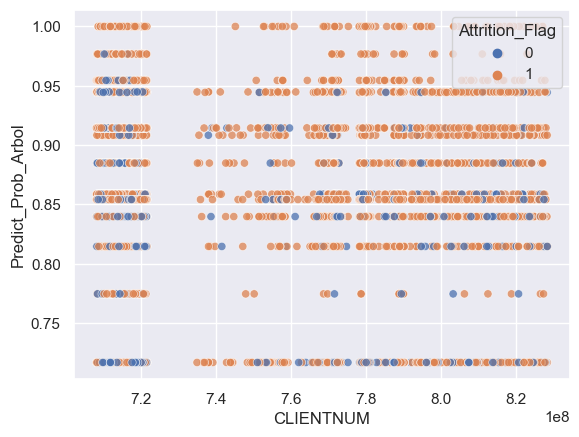

In [799]:
# Graficamente 
g1 = plt.figure()
sns.scatterplot(data = df,
                x = 'CLIENTNUM',
                y = 'Predict_Prob_Arbol',  
                alpha = 0.75,
                hue = 'Attrition_Flag')

<Axes: xlabel='Predict_Prob_Arbol', ylabel='Probability'>

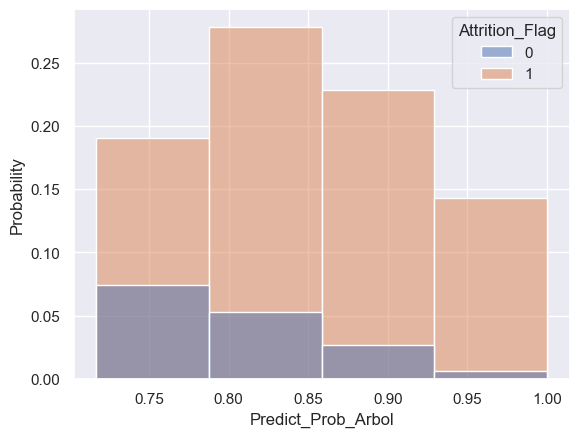

In [800]:
# Histogramas de predicción 
g1 = plt.figure()
sns.histplot(data = df,
             x = 'Predict_Prob_Arbol',  
             alpha = 0.5,
             hue = 'Attrition_Flag',
             stat = 'probability', 
             bins = 4)

<Axes: xlabel='Predict_Arbol_Nodo', ylabel='Tasa_NoCliente'>

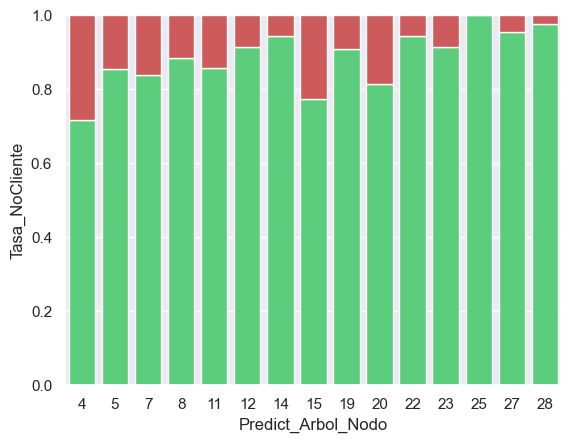

In [801]:
# Barplot por nodo 
resultados_nodo['Tasa_NoCliente'] = (1 - resultados_nodo['Predict_Prob_Arbol'])
sns.barplot(data = resultados_nodo,
            x = 'Predict_Arbol_Nodo',
            y = 'Predict_Prob_Arbol', 
            label = 'Porcentaje EsCliente',
            color = '#48E074')
sns.barplot(data=resultados_nodo, 
            x = 'Predict_Arbol_Nodo', 
            y = 'Tasa_NoCliente', 
            bottom=resultados_nodo['Predict_Prob_Arbol'], 
            label = 'Porcentaje No Es Cliente',
            color = '#E04848')

<h3 style="text-align:left;border-radius:8px;font-family:Times;font-variant:small-caps;color:#FFFFFF;background-color:#3300CC;">Modelo 1 - Regresión Logística</h3>

In [802]:
Total_Trans_Amt_Cli = df[['Attrition_Flag','Total_Trans_Amt']].groupby(by=['Total_Trans_Amt']).mean().reset_index()
Total_Trans_Amt_Cli.rename(columns={'Attrition_Flag': 'Total_Trans_Amt_EsCliente'}, inplace=True)
df = df.merge(Total_Trans_Amt_Cli,
              left_on = 'Total_Trans_Amt',
              right_on = 'Total_Trans_Amt',
              how = 'left')

Avg_Open_To_Buy_Cli = df[['Attrition_Flag','Avg_Open_To_Buy']].groupby(by=['Avg_Open_To_Buy']).mean().reset_index()
Avg_Open_To_Buy_Cli.rename(columns={'Attrition_Flag': 'Avg_Open_To_Buy_EsCliente'}, inplace=True)
df = df.merge(Avg_Open_To_Buy_Cli,
              left_on = 'Avg_Open_To_Buy',
              right_on = 'Avg_Open_To_Buy',
              how = 'left')

Credit_Limit_Cli = df[['Attrition_Flag','Credit_Limit']].groupby(by=['Credit_Limit']).mean().reset_index()
Credit_Limit_Cli.rename(columns={'Attrition_Flag': 'Credit_Limit_EsCliente'}, inplace=True)
df = df.merge(Credit_Limit_Cli,
              left_on = 'Credit_Limit',
              right_on = 'Credit_Limit',
              how = 'left')

Total_Revolving_Bal_Cli = df[['Attrition_Flag','Total_Revolving_Bal']].groupby(by=['Total_Revolving_Bal']).mean().reset_index()
Total_Revolving_Bal_Cli.rename(columns={'Attrition_Flag': 'Total_Revolving_Bal_EsCliente'}, inplace=True)
df = df.merge(Total_Revolving_Bal_Cli,
              left_on = 'Total_Revolving_Bal',
              right_on = 'Total_Revolving_Bal',
              how = 'left')

Total_Trans_Ct_Cli = df[['Attrition_Flag','Total_Trans_Ct']].groupby(by=['Total_Trans_Ct']).mean().reset_index()
Total_Trans_Ct_Cli.rename(columns={'Attrition_Flag': 'Total_Trans_Ct_EsCliente'}, inplace=True)
df = df.merge(Total_Trans_Ct_Cli,
              left_on = 'Total_Trans_Ct',
              right_on = 'Total_Trans_Ct',
              how = 'left')

In [803]:
# Predictores: 
lista_predictores = ['Total_Trans_Amt_EsCliente','Avg_Open_To_Buy_EsCliente','Credit_Limit_EsCliente','Total_Revolving_Bal_EsCliente','Total_Trans_Ct_EsCliente']

# Los transformo en matriz: 
X = df[lista_predictores].values

# Separar las características (X) y la variable objetivo (y)
X = df[lista_predictores]  # Aquí lista_predictores es la lista de características
y = df['Attrition_Flag']  # Attrition_Flag es la variable objetivo

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (por ejemplo, 70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo en el conjunto de prueba: {:.2f}%".format(accuracy * 100))

Precisión del modelo en el conjunto de prueba: 99.14%
